# Treinamento de Modelos com a Biblioteca Donkey Car utilizando o Google Colab
O Colab é uma ótima opção por dispor de GPU potente à disposição gratuitamente.

## Checar alocação da GPU para o ambiente

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.14.0


## Clonar o repositório Git da DonkeyCar


In [ ]:
!git clone https://github.com/autorope/donkeycar
%cd donkeycar
!git checkout main

Cloning into 'donkeycar'...
remote: Enumerating objects: 16249, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 16249 (delta 19), reused 21 (delta 7), pack-reused 16209
Receiving objects: 100% (16249/16249), 90.03 MiB | 33.60 MiB/s, done.
Resolving deltas: 100% (10795/10795), done.
/content/donkeycar
Already on 'main'
Your branch is up to date with 'origin/main'.


## Instalar donkey car

In [ ]:
!pip3 install -e .[pc]

Obtaining file:///content/donkeycar
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 71.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=cd3e1fe93cffef07ce123fbb21199b2cf1166ee96e15bdd9e7db1d56a85b8b31
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62118 sha256=ce13140233a017c7f6f1a6344d71a1aef49f1aa3011696e8bf293480d30d314e
  Stored in directory

## Criar Projeto

In [ ]:
!donkey createcar --path /content/mycar

________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v5.0.dev3 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying calibrate script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


### Defina o nome do seu tub aqui
Tub é o nome dado para a pasta data que contém tanto as imagens coletadas quanto os catálogos com informações passadas ao modelo.

In [ ]:
tub_name="treinamento-5"

### Monte o Google Drive no ambiente do colab
É importante que o tub já esteja no Drive para que se possa copiá-lo.
A estrutura do Drive neste notebook é Drive/jetson/{nome_do_tub} onde nome_do_tub varia de acordo com determinada coleta e nesta pasta se encontrará o arquivo zipado "data.zip". **Altere de acordo com o necessário.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Removendo o diretorio /data que é criado automaticamente para que ele possa ser substituído pelo que virá do Drive.

In [ ]:
%cd /content/mycar
%rmdir data

/content/mycar


# Copie e descompacte o data.zip

In [ ]:
!cp /content/drive/My\ Drive/jetson/{tub_name}/data.zip .

In [ ]:
!unzip data.zip
!rm data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/images/3114_cam_image_array_.jpg  
  inflating: data/images/3252_cam_image_array_.jpg  
  inflating: data/images/4418_cam_image_array_.jpg  
  inflating: data/images/3362_cam_image_array_.jpg  
  inflating: data/images/1004_cam_image_array_.jpg  
  inflating: data/images/4446_cam_image_array_.jpg  
  inflating: data/images/3356_cam_image_array_.jpg  
  inflating: data/images/3371_cam_image_array_.jpg  
  inflating: data/images/3428_cam_image_array_.jpg  
  inflating: data/images/4552_cam_image_array_.jpg  
  inflating: data/images/1427_cam_image_array_.jpg  
  inflating: data/images/3427_cam_image_array_.jpg  
  inflating: data/images/3468_cam_image_array_.jpg  
  inflating: data/images/4635_cam_image_array_.jpg  
  inflating: data/images/3516_cam_image_array_.jpg  
  inflating: data/images/4933_cam_image_array_.jpg  
  inflating: data/images/3930_cam_image_array_.jpg  
  inflating: data/images/2169_cam_image_array_.j

Verificando os dados copiados e descompactados

In [ ]:
%cd /content/mycar
!ls data

/content/mycar
catalog_0.catalog	    catalog_2.catalog		catalog_4.catalog	    images
catalog_0.catalog_manifest  catalog_2.catalog_manifest	catalog_4.catalog_manifest  manifest.json
catalog_1.catalog	    catalog_3.catalog		catalog_5.catalog
catalog_1.catalog_manifest  catalog_3.catalog_manifest	catalog_5.catalog_manifest


# Usando um segundo Tub
É possível que na hora da coleta, esta tenha sido feita em momentos distintos, assim acabando com dois ou mais Tubs(diretórios /data) e portanto aqui demonstra-se a nomeação de um segundo local de Tub.

In [ ]:
tub_name2="treinamento-4"

In [ ]:
%mkdir data1
%cd /content/mycar/data1
!cp /content/drive/My\ Drive/jetson/{tub_name2}/data.zip .

/content/mycar/data1


In [ ]:
!unzip data.zip
!rm data.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/9927_cam_image_array_.jpg  
  inflating: images/8778_cam_image_array_.jpg  
  inflating: images/16554_cam_image_array_.jpg  
  inflating: images/3678_cam_image_array_.jpg  
  inflating: images/16395_cam_image_array_.jpg  
  inflating: images/15805_cam_image_array_.jpg  
  inflating: images/259_cam_image_array_.jpg  
  inflating: images/10784_cam_image_array_.jpg  
  inflating: images/1818_cam_image_array_.jpg  
  inflating: images/8138_cam_image_array_.jpg  
  inflating: images/4506_cam_image_array_.jpg  
  inflating: images/4753_cam_image_array_.jpg  
  inflating: images/3583_cam_image_array_.jpg  
  inflating: images/6383_cam_image_array_.jpg  
  inflating: images/12106_cam_image_array_.jpg  
  inflating: images/6787_cam_image_array_.jpg  
  inflating: images/3197_cam_image_array_.jpg  
  inflating: images/0_cam_image_array_.jpg  
  inflating: images/14343_cam_image_array_.jpg  
  inflating: images/9958_cam_image_

In [ ]:
%cd /content/mycar
!ls data1

/content/mycar
catalog_0.catalog	     catalog_15.catalog_manifest  catalog_5.catalog
catalog_0.catalog_manifest   catalog_16.catalog		  catalog_5.catalog_manifest
catalog_10.catalog	     catalog_16.catalog_manifest  catalog_6.catalog
catalog_10.catalog_manifest  catalog_17.catalog		  catalog_6.catalog_manifest
catalog_11.catalog	     catalog_17.catalog_manifest  catalog_7.catalog
catalog_11.catalog_manifest  catalog_1.catalog		  catalog_7.catalog_manifest
catalog_12.catalog	     catalog_1.catalog_manifest   catalog_8.catalog
catalog_12.catalog_manifest  catalog_2.catalog		  catalog_8.catalog_manifest
catalog_13.catalog	     catalog_2.catalog_manifest   catalog_9.catalog
catalog_13.catalog_manifest  catalog_3.catalog		  catalog_9.catalog_manifest
catalog_14.catalog	     catalog_3.catalog_manifest   images
catalog_14.catalog_manifest  catalog_4.catalog		  manifest.json
catalog_15.catalog	     catalog_4.catalog_manifest


## Treinando o Modelo
Abaixo temos algumas opções de treinamento alterando-se o tipo de modelo de acordo com o explicado em https://docs.donkeycar.com/parts/keras/

In [ ]:
%cd /content/mycar

# !donkey train --tub ./data --model ./models/mypilot.h5   # Linear (Padrão)
# !donkey train --tub ./data --model ./models/mymempilot3.h5 --type=memory # Memory
!donkey train --tub ./data ./data1 --model ./models/mymempilot4e5.h5 --type=memory # Memory com dois Tubs

/content/mycar
________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v5.0.dev3 ...
INFO:donkeycar.config:loading config file: ./config.py
INFO:donkeycar.config:loading personal config over-rides from ./myconfig.py
2023-10-25 21:45:29.416557: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-25 21:45:29.416638: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already

Verifique se o modelo foi gerado


In [ ]:
!ls -alh /content/mycar/models

total 13M
drwxr-xr-x 2 root root 4.0K Oct 25 21:51 .
drwxr-xr-x 6 root root 4.0K Oct 25 21:43 ..
-rw-r--r-- 1 root root 9.6K Oct 25 21:51 database.json
-rw-r--r-- 1 root root 9.5M Oct 25 21:49 mymempilot4e5.h5
-rw-r--r-- 1 root root  23K Oct 25 21:51 mymempilot4e5.png
-rw-r--r-- 1 root root 3.2M Oct 25 21:51 mymempilot4e5.tflite


# Observe a curva da perda e validação do modelo ao longo das épocas

/content/mycar/models


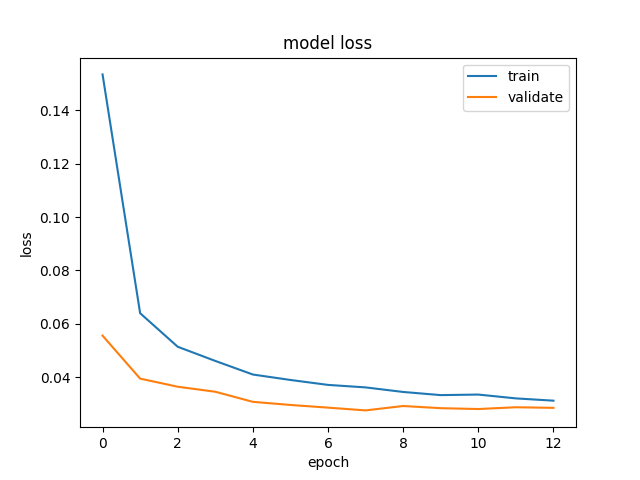

In [ ]:
%cd /content/mycar/models

import glob
file = glob.glob("*.png")

from IPython.display import Image
Image(file[0])

## Faça o download do modelo ou copie direto para o Google Drive para colocá-lo no carrinho

Download

In [ ]:
from google.colab import files

# files.download('./mypilot.h5') #Linear
files.download('./mymempilot2.h5') # Memorial com dois Tubs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Google Drive

In [ ]:
# !cp /content/mycar/models/mypilot.h5 /content/drive/My\ Drive/jetson/{tub_name}/models/mypilot.h5 #Linear
!cp /content/mycar/models/mymempilot4.h5 /content/drive/My\ Drive/jetson/{tub_name}/models/mymempilot4.h5 #Memory com dois Tubs

## Para rodar o modelo no carrinho


```bash
cd ~/mycar
python manage.py drive --model models/mymempilot2.h5 --type=memory
```


## Bônus - Salient Object Visualization
Aqui vamos gerar um vídeo com um indicador para compararmos a orientação dada na hora da direção manual com o obtido pelo modelo treinado. **Somente para modelos lineares e categoricos**.

In [ ]:
!pip uninstall keras-vis
!pip install git+https://github.com/sctse999/keras-vis

  Cloning https://github.com/sctse999/keras-vis to /tmp/pip-req-build-e_0jdm8f
  Running command git clone --filter=blob:none --quiet https://github.com/sctse999/keras-vis /tmp/pip-req-build-e_0jdm8f
  Resolved https://github.com/sctse999/keras-vis to commit 93e1e803dc0779e25f95b6c1e871d499414e5404
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=30957 sha256=1c80237de1a4ef9a3e607db40ed4fa55cd91dfc0520d44d1946a0aed422b968a
  Stored in directory: /tmp/pip-ephem-wheel-cache-cyl521b0/wheels/76/f4/c7/79f07c4e592d76b0adc5dc32b610988e36a56e8d288d286612
Successfully built keras-vis


In [ ]:
!pip install imageio-ffmpeg

In [ ]:
%cd /content/mycar
!donkey makemovie --tub ./data --model models/mypilot.h5 --type linear --salient

/content/mycar
________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v5.0.dev3 ...
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer retu

In [ ]:
from google.colab import files

%cd /content/mycar
!ls -ahl
files.download('tub_movie.mp4')

/content/mycar
total 25M
drwxr-xr-x 5 root root 4.0K Sep 27 00:10 .
drwxr-xr-x 1 root root 4.0K Sep 26 23:57 ..
-rwx------ 1 root root 4.8K Sep 26 23:56 calibrate.py
-rw-r--r-- 1 root root  40K Sep 26 23:56 config.py
drwxr-xr-x 3 root root 4.0K Sep 26 23:58 data
drwxr-xr-x 2 root root 4.0K Sep 26 23:56 logs
-rwx------ 1 root root  47K Sep 26 23:56 manage.py
drwxr-xr-x 2 root root 4.0K Sep 27 00:05 models
-rw-r--r-- 1 root root  42K Sep 26 23:56 myconfig.py
-rwx------ 1 root root  728 Sep 26 23:56 train.py
-rw-r--r-- 1 root root  25M Sep 27 00:23 tub_movie.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>